In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## Part 1 Get Data

In [15]:
azimuth_neg90 = pd.read_csv('lab1_azimuth_-90.csv')
azimuth_0 = pd.read_csv('lab1_azimuth_00.csv')
azimuth_90 = pd.read_csv('lab1_azimuth_90.csv')

In [32]:
range_neg90 = azimuth_neg90['Range(m)'].to_numpy()
range_0 = azimuth_0['Range(m)'].to_numpy()
range_90 = azimuth_90['Range(m)'].to_numpy()

In [49]:
mean_neg90 = azimuth_neg90['Range(m)'].mean()

In [50]:
std_neg90 = azimuth_neg90['Range(m)'].std()

## Part 2 Create Histograms

[]

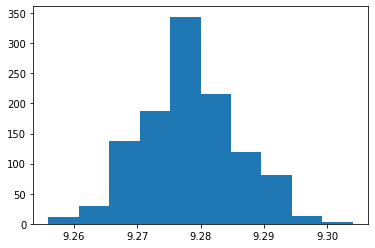

In [36]:
plt.hist(range_neg90, 10)
plt.show()

[]

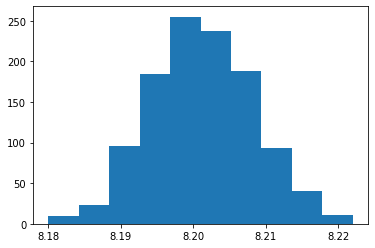

In [37]:
plt.hist(range_0, 10)
plt.show()

[]

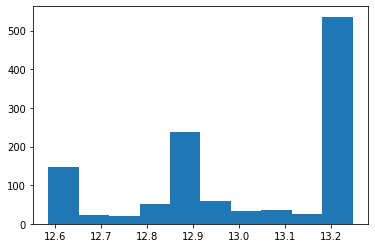

In [38]:
plt.hist(range_90, 10)
plt.show()

## Part 3 Create Model

In [53]:
[range_neg90_count, range_neg90_binEdges] = np.histogram(range_neg90, bins=10)

In [54]:
normalizedCount = range_neg90_count / azimuth_neg90['Range(m)'].count()

[]

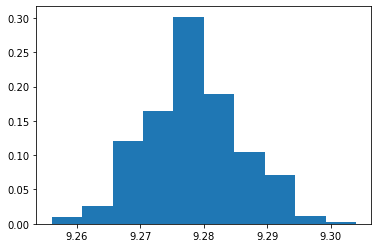

In [63]:
plt.hist(range_neg90_binEdges[:-1], range_neg90_binEdges, weights=normalizedCount)
plt.show()

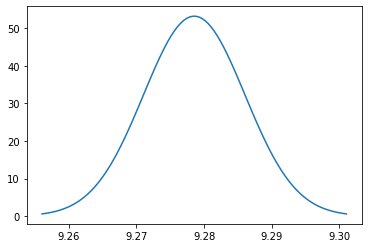

In [78]:
x = np.linspace(mean_neg90 - 3*std_neg90, mean_neg90 + 3*std_neg90, 100)
plt.plot(x, stats.norm.pdf(x, mean_neg90, std_neg90))
plt.show()

In [86]:
np.trapz(stats.norm.pdf(x, mean_neg90, std_neg90), x=x)

0.997292067626924

In [97]:
stats.norm(mean_neg90, std_neg90).cdf(9.2656) - stats.norm(mean_neg90, std_neg90).cdf(9.2608)

0.03309416255844499

In [102]:
for prob in normalizedCount:
    print(prob)

0.009649122807017544
0.02631578947368421
0.12017543859649123
0.16403508771929826
0.3017543859649123
0.18859649122807018
0.10438596491228071
0.07105263157894737
0.011403508771929825
0.002631578947368421


In [100]:
for i in range(len(range_neg90_binEdges) - 1):
    print(stats.norm(mean_neg90, std_neg90).cdf(range_neg90_binEdges[i+1]) - stats.norm(mean_neg90, std_neg90).cdf(range_neg90_binEdges[i]))

0.007636927529162376
0.03309416255846626
0.09641305797387179
0.18893444907978663
0.2491359220650043
0.22109499455857284
0.13204122946056274
0.05305233868656534
0.01433358288062303
0.002602439019544711


## Part 4 Transform and plot the GPS measurements

In [105]:
lat_0 = azimuth_0['Latitude'].to_numpy()
long_0 = azimuth_0['Longitude'].to_numpy()

origin_lat = np.mean(lat_0)
origin_long = np.mean(long_0)

In [106]:
azimuth_0

,Range(m),Elevation(degrees),Azimuth(degrees),Reflectivity,Time Stamp(s),Latitude,Longitude,Time Stamp(s).1
0,8.186,1.0,0.178333,11.0,1317.391977,34.106433,-117.712032,1317.436316
1,8.194,1.0,0.378333,11.0,1317.391977,34.106433,-117.712032,1317.436316
2,8.208,1.0,0.108333,13.0,1317.691902,34.106433,-117.712032,1317.767028
3,8.198,1.0,0.308333,13.0,1317.691902,34.106433,-117.712032,1317.767028
4,8.194,1.0,0.158542,11.0,1318.291754,34.106433,-117.712032,1318.362909
...,...,...,...,...,...,...,...,...
1133,8.214,1.0,0.567917,13.0,1914.591673,34.106417,-117.711992,1914.677234
1134,8.194,1.0,0.238333,11.0,1915.391918,34.106417,-117.711992,1915.471758
1135,8.200,1.0,0.438333,13.0,1915.391918,34.106417,-117.711992,1915.471758
1136,8.196,1.0,0.088333,13.0,1915.991769,34.106417,-117.711992,1916.072516


In [155]:
def getCoord(point, origin):    
    pointLat = np.array(point[0])
    pointLong = np.array(point[1])
    
    earthCirc = 40008000
    dx = (pointLong - origin[1])*earthCirc*np.cos((pointLat + origin[0])*np.pi/360)/360
    dy = (pointLat - origin[0])*earthCirc/360
    
    return [dx, dy]


In [156]:
[xCoord, yCoord] = getCoord(np.array([lat_0, long_0]), np.array([origin_lat, origin_long]))

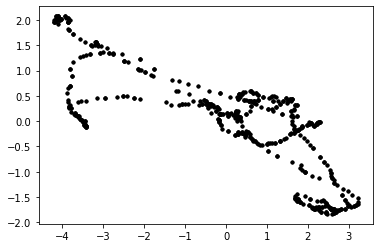

In [157]:
plt.plot(xCoord, yCoord, '.k')

In [160]:
np.square(np.std(xCoord))

4.992026640165638

In [161]:
np.square(np.std(yCoord))

1.0122727924461241

## Implement Bayes Rule

## Part 6 Create Police Data Model

In [163]:
class Incident(object):

    def __init__(self, row):    
        self.Victims_name = row[0]
        self.victims_age = row[1]
        self.victims_gender = row[2]
        self.victims_race = row[3]
        self.url = row[4]
        self.date = row[5]
        self.street_address = row[6]
        self.city = row[7]
        self.state = row[8]
        self.zipcode = row[9]
        self.county = row[10]
        self.agency = row[11]
        self.cause_of_death = row[12]
        self.description = row[13]
        self.official_disposition = row[14]
        self.criminal_charges = row[15]
        self.news_article = row[16]
        self.symptoms_of_mental_illness = row[17]
        self.unarmed = row[18]
        self.alleged_weapon = row[19]
        self.alleged_threat_level = row[20]
        self.fleeing = row[21]
        self.body_camera = row[22]
        self.wapo_id = row[23]
        self.off_duty_killing = row[24]
        self.geography = row[25]
        self.id = row[26]
        

# Read in the data
print('1. Opening file.')
with open('police_killings.csv') as csvfile:
    print('2. Loading data.')
    readCSV = csv.reader(csvfile, delimiter=',')
    i=0
    incident_list = []
    for row in readCSV:
        incident_list.append(Incident(row))      
    print('3. Done loading data.')


1. Opening file.
2. Loading data.
3. Done loading data.


In [173]:
policeData = pd.read_csv('police_killings.csv')
policeData = policeData[['Victim\'s age', 'Victim\'s race']]
policeData = policeData.dropna(axis='rows')

In [176]:
policeData

,Victim's age,Victim's race
0,28,White
2,57,Black
3,23,Black
4,37,Black
5,49,White
...,...,...
7658,49,Hispanic
7659,31,Black
7660,21,Hispanic
7661,21,White


In [228]:
age = policeData['Victim\'s age'].to_numpy()
test = ','.join(age)
age = np.fromstring(test, dtype=np.int, sep=',')

/Users/christinalau/anaconda/envs/E190/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [229]:
policeData['Victim\'s age']

0       28
2       57
3       23
4       37
5       49
        ..
7658    49
7659    31
7660    21
7661    21
7662    26
Name: Victim's age, Length: 7596, dtype: object

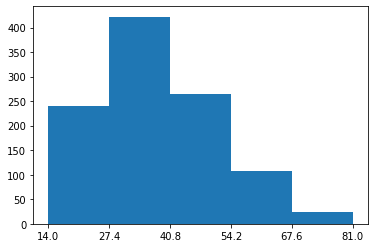

In [238]:
#plt.hist(age, bins = [0, 16, 21, 26, 31])
[ageCount, ageEdges] = np.histogram(age, bins = 5)
plt.hist(ageEdges[:-1], ageEdges, weights = ageCount)
plt.xticks(ageEdges)
plt.show()

In [232]:
np.histogram(age, bins = [0, 16, 21, 26, 31])

(array([  1,  66, 106, 208]), array([ 0, 16, 21, 26, 31]))

In [235]:
np.max(age)

81

In [240]:
policeData

,Victim's age,Victim's race
0,28,White
2,57,Black
3,23,Black
4,37,Black
5,49,White
...,...,...
7658,49,Hispanic
7659,31,Black
7660,21,Hispanic
7661,21,White


In [244]:
black = policeData.loc[policeData['Victim\'s race'] == 'Black']
white = policeData.loc[policeData['Victim\'s race'] == 'White']
hispanic = policeData.loc[policeData['Victim\'s race'] == 'Hispanic']
asian = policeData.loc[policeData['Victim\'s race'] == 'Asian']

In [254]:
blackAge = black['Victim\'s age'].to_numpy()
blackAge = np.fromstring(','.join(blackAge), dtype=np.int, sep=',')

/Users/christinalau/anaconda/envs/E190/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  


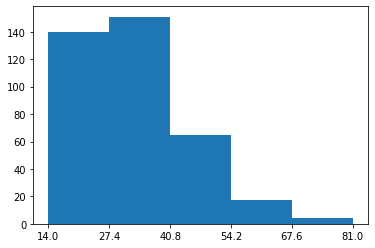

In [256]:
plt.hist(blackAge, bins = ageEdges)
plt.xticks(ageEdges)
plt.show()

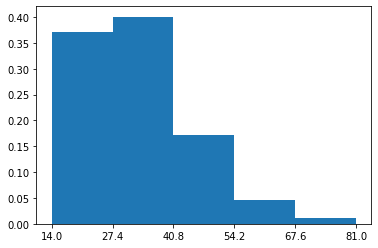

In [273]:
[blackCount, blackEdge] = np.histogram(blackAge, bins = ageEdges)
normalizedBlCount = blackCount / blackAge.size

plt.hist(blackEdge[:-1], blackEdge, weights = normalizedBlCount)
plt.xticks(ageEdges)
plt.show()

In [271]:
np.sum(np.array([0.37135279, 0.4005305 , 0.17241379, 0.04509284, 0.01061008]))

1.0